In [1]:
from collections import namedtuple

In [2]:
Point = namedtuple('Point', 'x, y')

In [3]:
p1 = Point(10.5, 3.2)

In [4]:
p1

Point(x=10.5, y=3.2)

In [5]:
p1 = Point('abc', y=[1,2,3])

In [6]:
p1

Point(x='abc', y=[1, 2, 3])

In [7]:
x,y = p1

In [8]:
x

'abc'

In [9]:
y

[1, 2, 3]

In [11]:
import numbers

In [13]:
isinstance(10, numbers.Number)

True

In [14]:
isinstance('a', numbers.Number)

False

In [15]:
isinstance(10+2j, numbers.Number)

True

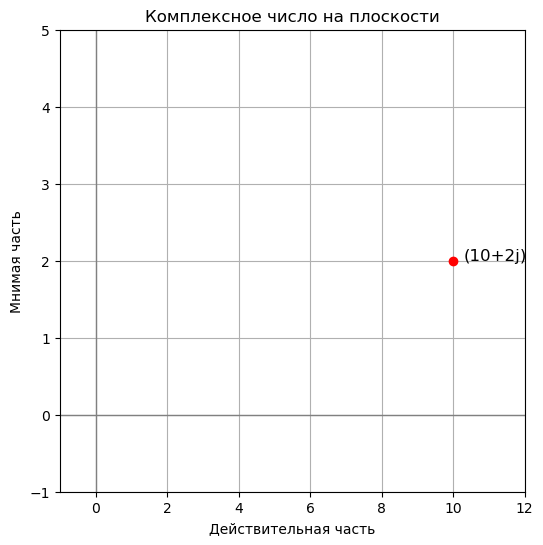

In [16]:
import matplotlib.pyplot as plt

z = 10 + 2j

plt.figure(figsize=(6,6))
plt.axhline(0, color='gray', lw=1)  # горизонтальная ось
plt.axvline(0, color='gray', lw=1)  # вертикальная ось

plt.plot(z.real, z.imag, 'ro')  # точка комплексного числа красным
plt.text(z.real + 0.3, z.imag, f'{z}', fontsize=12)

plt.xlim(-1, 12)
plt.ylim(-1, 5)
plt.xlabel('Действительная часть')
plt.ylabel('Мнимая часть')
plt.title('Комплексное число на плоскости')
plt.grid(True)
plt.show()

In [17]:
isinstance(10, numbers.Real)

True

In [18]:
isinstance(10+2j, numbers.Real)

False

In [19]:
class Point:
    def __init__(self, x, y):
        if isinstance(x, numbers.Real) and isinstance(y, numbers.Real):
            self._pt = (x,y)
        else:
            raise TypeError('Point co-ordinates must be a real numbers.')

    def __repr__(self):
        return f'Point(x={self._pt[0]}, y={self._pt[1]})'

In [20]:
p1 = Point(10, 2.5)

In [21]:
p1

Point(x=10, y=2.5)

In [22]:
p1 = Point('abc', 10)

TypeError: Point co-ordinates must be a real numbers.

In [23]:
x, y = p1

TypeError: cannot unpack non-iterable Point object

In [25]:
class Point:
    def __init__(self, x, y):
        if isinstance(x, numbers.Real) and isinstance(y, numbers.Real):
            self._pt = (x,y)
        else:
            raise TypeError('Point co-ordinates must be a real numbers.')

    def __repr__(self):
        return f'Point(x={self._pt[0]}, y={self._pt[1]})'

    def __len__(self):
        return len(self._pt)

    def __getitem__(self, s):
        return self._pt[s]

In [26]:
p1 = Point(10, 2)


In [27]:
x,y = p1

In [28]:
x

10

In [29]:
y

2

In [30]:
x,y,z = p1

ValueError: not enough values to unpack (expected 3, got 2)

In [31]:
p2 = Point(*p1)

In [32]:
p1

Point(x=10, y=2)

In [33]:
p2

Point(x=10, y=2)

In [34]:
id(p1), id(p2)

(1888966864688, 1888935375456)

In [38]:
class Polygon:
    def __init__(self, *pts):
        if pts:
            self._pts = [Point(*pt) for pt in pts]
        else:
            self._pts = []


    def __repr__(self):
        return f'Polygon({self._pts})'

In [39]:
p = Polygon((0,0), Point(1,1))

In [40]:
p

Polygon([Point(x=0, y=0), Point(x=1, y=1)])

In [41]:
p2 = Polygon([Point(x=0, y=0), Point(x=1, y=1)])

TypeError: Point co-ordinates must be a real numbers.

In [48]:
class Polygon:
    def __init__(self, *pts):
        if pts:
            self._pts = [Point(*pt) for pt in pts]
        else:
            self._pts = []


    def __repr__(self):
        pts_str = ', '.join([str(pt) for pt in self._pts])
        return f'Polygon({pts_str})'


    def __len__(self):
        return len(self._pts)

    def __getitem__(self, s):
        return self._pts[s]

In [43]:
p = Polygon((0,0), Point(1,1))

In [44]:
p

Polygon(Point(x=0, y=0), Point(x=1, y=1))

In [45]:
p2 = Polygon(Point(x=0, y=0), Point(x=1, y=1))

In [46]:
p1

Point(x=10, y=2)

In [47]:
p2

Polygon(Point(x=0, y=0), Point(x=1, y=1))

In [49]:
p = Polygon((0,0), (1,1), (2,2))

In [50]:
p[0]

Point(x=0, y=0)

In [51]:
p[0:2]

[Point(x=0, y=0), Point(x=1, y=1)]

In [58]:
class Polygon:
    def __init__(self, *pts):
        if pts:
            self._pts = [Point(*pt) for pt in pts]
        else:
            self._pts = []


    def __repr__(self):
        pts_str = ', '.join([str(pt) for pt in self._pts])
        return f'Polygon({pts_str})'


    def __len__(self):
        return len(self._pts)

    def __getitem__(self, s):
        return self._pts[s]

    def __add__(self, other):
        if isinstance(other, Polygon):
            new_pts = self._pts + other._pts
            return Polygon(*new_pts)
        else:
            raise TypeError('Can only concatenate with another Polygon')

    def __iadd__(self, other):
        if isinstance(other, Polygon):
            self._pts = self._pts + other._pts
            return self
        else:
            raise TypeError('Can only concatenate with another Polygon')

In [54]:
p1 = Polygon((0,0), (1,1))
p2 = Polygon((2,2), (3,3))
id(p1), id(p2)

(1888967546288, 1888966177184)

In [55]:
result = p1 + p2
print(id(result), result)

1888932504896 Polygon(Point(x=0, y=0), Point(x=1, y=1), Point(x=2, y=2), Point(x=3, y=3))


In [63]:
p1 = Polygon((0,0), (1,1))
p2 = Polygon((2,2), (3,3))
id(p1), id(p2)

(1888967026560, 1888991514352)

In [60]:
p1 += p2

In [64]:
id(p1), p1

(1888967026560, Polygon(Point(x=0, y=0), Point(x=1, y=1)))

In [65]:
p1 = p1.__iadd__(p2)

In [66]:
id(p1), p1

(1888967026560,
 Polygon(Point(x=0, y=0), Point(x=1, y=1), Point(x=2, y=2), Point(x=3, y=3)))

In [67]:
p1 = Polygon((0,0), (1,1))


In [68]:
p1 += [(2,2), (3,3)]

TypeError: Can only concatenate with another Polygon

In [72]:
class Polygon:
    def __init__(self, *pts):
        if pts:
            self._pts = [Point(*pt) for pt in pts]
        else:
            self._pts = []


    def __repr__(self):
        pts_str = ', '.join([str(pt) for pt in self._pts])
        return f'Polygon({pts_str})'


    def __len__(self):
        return len(self._pts)

    def __getitem__(self, s):
        return self._pts[s]

    def __add__(self, other):
        if isinstance(other, Polygon):
            new_pts = self._pts + other._pts
            return Polygon(*new_pts)
        else:
            raise TypeError('Can only concatenate with another Polygon')

    def __iadd__(self, other):
        if isinstance(other, Polygon):
            points = other._pts
        else:
            points = [Point(*pt) for pt in other]
        self._pts = self._pts + points
        return self

In [73]:
p1 = Polygon((0,0), (1,1))
id(p1)

1888991516464

In [74]:
p1 += [(2,2), (3,3), Point(4,4)]

In [75]:
id(p1), p1

(1888991516464,
 Polygon(Point(x=0, y=0), Point(x=1, y=1), Point(x=2, y=2), Point(x=3, y=3), Point(x=4, y=4)))

In [87]:
class Polygon:
    def __init__(self, *pts):
        if pts:
            self._pts = [Point(*pt) for pt in pts]
        else:
            self._pts = []


    def __repr__(self):
        pts_str = ', '.join([str(pt) for pt in self._pts])
        return f'Polygon({pts_str})'


    def __len__(self):
        return len(self._pts)

    def __getitem__(self, s):
        return self._pts[s]

    def __add__(self, other):
        if isinstance(other, Polygon):
            new_pts = self._pts + other._pts
            return Polygon(*new_pts)
        else:
            raise TypeError('Can only concatenate with another Polygon')

    def append(self, pt):
        self._pts.append(Point(*pt))

    def insert(self, i, pt):
        self._pts.insert(i, Point(*pt))

    def extend(self, pts):
        if isinstance(pts, Polygon):
            self._pts += pts._pts
        else:
            points = [Point(*pt) for pt in pts]
            self._pts += points

    def __iadd__(self, other):
        self.extend(other)
        return self

In [88]:
p1 = Polygon((0,0), (1,1))
p2 = Polygon((2,2), (3,3))
print(id(p1), p1) 
print(id(p2), p2)

1888991604288 Polygon(Point(x=0, y=0), Point(x=1, y=1))
1888967450672 Polygon(Point(x=2, y=2), Point(x=3, y=3))


In [89]:
p1.append([10, 10])
id(p1), p1

(1888991604288, Polygon(Point(x=0, y=0), Point(x=1, y=1), Point(x=10, y=10)))

In [90]:
p1.insert(1, Point(-1,-1))
id(p1), p1

(1888991604288,
 Polygon(Point(x=0, y=0), Point(x=-1, y=-1), Point(x=1, y=1), Point(x=10, y=10)))

In [91]:
p1.extend(p2)
print(id(p1), p1)

1888991604288 Polygon(Point(x=0, y=0), Point(x=-1, y=-1), Point(x=1, y=1), Point(x=10, y=10), Point(x=2, y=2), Point(x=3, y=3))


In [92]:
p1.extend([(0,0), Point(20, 20)])
print(id(p1), p1)

1888991604288 Polygon(Point(x=0, y=0), Point(x=-1, y=-1), Point(x=1, y=1), Point(x=10, y=10), Point(x=2, y=2), Point(x=3, y=3), Point(x=0, y=0), Point(x=20, y=20))


In [93]:
p1.extend(Point(0,0))

TypeError: __main__.Point() argument after * must be an iterable, not int

In [94]:
class Polygon:
    def __init__(self, *pts):
        if pts:
            self._pts = [Point(*pt) for pt in pts]
        else:
            self._pts = []


    def __repr__(self):
        pts_str = ', '.join([str(pt) for pt in self._pts])
        return f'Polygon({pts_str})'


    def __len__(self):
        return len(self._pts)

    def __getitem__(self, s):
        return self._pts[s]

    def __setitem__(self, s, value):
        self._pts[s] = [Point(*pt) for pt in value]
    
    def __add__(self, other):
        if isinstance(other, Polygon):
            new_pts = self._pts + other._pts
            return Polygon(*new_pts)
        else:
            raise TypeError('Can only concatenate with another Polygon')

    def append(self, pt):
        self._pts.append(Point(*pt))

    def insert(self, i, pt):
        self._pts.insert(i, Point(*pt))

    def extend(self, pts):
        if isinstance(pts, Polygon):
            self._pts += pts._pts
        else:
            points = [Point(*pt) for pt in pts]
            self._pts += points

    def __iadd__(self, other):
        self.extend(other)
        return self

In [95]:
p = Polygon((0,0), (1,1), (2,2))
print(id(p), p)

1888991598048 Polygon(Point(x=0, y=0), Point(x=1, y=1), Point(x=2, y=2))


In [96]:
p[0:2]

[Point(x=0, y=0), Point(x=1, y=1)]

In [97]:
p[0:2] = [(10,10), Point(20,20), (30,30)]

In [98]:
p

Polygon(Point(x=10, y=10), Point(x=20, y=20), Point(x=30, y=30), Point(x=2, y=2))

In [99]:
id(p)

1888991598048

In [100]:
p[0]

Point(x=10, y=10)

In [101]:
p[0] = Point(0,0)

TypeError: __main__.Point() argument after * must be an iterable, not int

In [102]:
class Polygon:
    def __init__(self, *pts):
        if pts:
            self._pts = [Point(*pt) for pt in pts]
        else:
            self._pts = []


    def __repr__(self):
        pts_str = ', '.join([str(pt) for pt in self._pts])
        return f'Polygon({pts_str})'


    def __len__(self):
        return len(self._pts)

    def __getitem__(self, s):
        return self._pts[s]

    def __setitem__(self, s, value):
        if isinstance(s, int):
            self._pts[s] = Point(*value)
        else:
            self._pts[s] = [Point(*pt) for pt in value]
    
    def __add__(self, other):
        if isinstance(other, Polygon):
            new_pts = self._pts + other._pts
            return Polygon(*new_pts)
        else:
            raise TypeError('Can only concatenate with another Polygon')

    def append(self, pt):
        self._pts.append(Point(*pt))

    def insert(self, i, pt):
        self._pts.insert(i, Point(*pt))

    def extend(self, pts):
        if isinstance(pts, Polygon):
            self._pts += pts._pts
        else:
            points = [Point(*pt) for pt in pts]
            self._pts += points

    def __iadd__(self, other):
        self.extend(other)
        return self

In [103]:
p = Polygon((0,0), (1,1), (2,2))
print(id(p), p)

1888995969840 Polygon(Point(x=0, y=0), Point(x=1, y=1), Point(x=2, y=2))


In [104]:
p[0] = Point(10,10)

In [105]:
p, id(p)

(Polygon(Point(x=10, y=10), Point(x=1, y=1), Point(x=2, y=2)), 1888995969840)

In [106]:
p[0] = [-1, -1]

In [107]:
print(p, id(p))

Polygon(Point(x=-1, y=-1), Point(x=1, y=1), Point(x=2, y=2)) 1888995969840


In [108]:
l = [1,2,3,4]
l[0:2] = 20

TypeError: must assign iterable to extended slice

In [109]:
p

Polygon(Point(x=-1, y=-1), Point(x=1, y=1), Point(x=2, y=2))

In [110]:
p[0:2] = Point(20, 20)

TypeError: __main__.Point() argument after * must be an iterable, not int

In [111]:
p[0] = [Point(10,10), Point(20,20)]

TypeError: Point co-ordinates must be a real numbers.

In [112]:
class Polygon:
    def __init__(self, *pts):
        if pts:
            self._pts = [Point(*pt) for pt in pts]
        else:
            self._pts = []


    def __repr__(self):
        pts_str = ', '.join([str(pt) for pt in self._pts])
        return f'Polygon({pts_str})'


    def __len__(self):
        return len(self._pts)

    def __getitem__(self, s):
        return self._pts[s]

    def __setitem__(self, s, value):
        try:
            rhs = [Point(*pt) for pt in value]
            is_single = False
        except TypeError:
            try:
                rhs = Point(*value)
                is_single = True
            except TypeError:
                raise TypeError('Invalid Point or iterable of Points')
        if (isinstance(s, int) and is_single) or (isinstance(s, slice) and not is_single):
            self._pts[s] = rhs
        else:
            raise TypeError('Incompatible index/slice assignment')
    
    def __add__(self, other):
        if isinstance(other, Polygon):
            new_pts = self._pts + other._pts
            return Polygon(*new_pts)
        else:
            raise TypeError('Can only concatenate with another Polygon')

    def append(self, pt):
        self._pts.append(Point(*pt))

    def insert(self, i, pt):
        self._pts.insert(i, Point(*pt))

    def extend(self, pts):
        if isinstance(pts, Polygon):
            self._pts += pts._pts
        else:
            points = [Point(*pt) for pt in pts]
            self._pts += points

    def __iadd__(self, other):
        self.extend(other)
        return self

In [116]:
p = Polygon((0,0), (1,1), (2,2))

In [117]:
p[0] = [(0,0), (1,1)]

TypeError: Incompatible index/slice assignment

In [118]:
p[0:2] = Point(0,0)

TypeError: Incompatible index/slice assignment

In [119]:
p[0] = ['a', 'b']

TypeError: Invalid Point or iterable of Points

In [120]:
l = [1,2,3,4,5]

In [121]:
del l[0]

In [122]:
l

[2, 3, 4, 5]

In [123]:
del l[0:2]

In [124]:
l

[4, 5]

In [125]:
l.pop(0)

4

In [126]:
l

[5]

In [127]:
class Polygon:
    def __init__(self, *pts):
        if pts:
            self._pts = [Point(*pt) for pt in pts]
        else:
            self._pts = []


    def __repr__(self):
        pts_str = ', '.join([str(pt) for pt in self._pts])
        return f'Polygon({pts_str})'


    def __len__(self):
        return len(self._pts)

    def __getitem__(self, s):
        return self._pts[s]

    def __setitem__(self, s, value):
        try:
            rhs = [Point(*pt) for pt in value]
            is_single = False
        except TypeError:
            try:
                rhs = Point(*value)
                is_single = True
            except TypeError:
                raise TypeError('Invalid Point or iterable of Points')
        if (isinstance(s, int) and is_single) or (isinstance(s, slice) and not is_single):
            self._pts[s] = rhs
        else:
            raise TypeError('Incompatible index/slice assignment')
    
    def __add__(self, other):
        if isinstance(other, Polygon):
            new_pts = self._pts + other._pts
            return Polygon(*new_pts)
        else:
            raise TypeError('Can only concatenate with another Polygon')

    def append(self, pt):
        self._pts.append(Point(*pt))

    def insert(self, i, pt):
        self._pts.insert(i, Point(*pt))

    def extend(self, pts):
        if isinstance(pts, Polygon):
            self._pts += pts._pts
        else:
            points = [Point(*pt) for pt in pts]
            self._pts += points

    def __iadd__(self, other):
        self.extend(other)
        return self

    def __delitem__(self, s):
        del self._pts[s]

    def pop(self, i):
        return self._pts.pop(i)

In [136]:
p = Polygon((0,0), (1,1), (2,2))

In [137]:
del p[0]

In [138]:
p

Polygon(Point(x=1, y=1), Point(x=2, y=2))

In [139]:
p.pop(1)

Point(x=2, y=2)

In [140]:
del p[0:1]

In [141]:
p

Polygon()

In [142]:
class Polygon:
    def __init__(self, *pts):
        if pts:
            self._pts = [Point(*pt) for pt in pts]
        else:
            self._pts = []


    def __repr__(self):
        pts_str = ', '.join([str(pt) for pt in self._pts])
        return f'Polygon({pts_str})'


    def __len__(self):
        return len(self._pts)

    def __getitem__(self, s):
        return self._pts[s]

    def __setitem__(self, s, value):
        try:
            rhs = [Point(*pt) for pt in value]
            is_single = False
        except TypeError:
            try:
                rhs = Point(*value)
                is_single = True
            except TypeError:
                raise TypeError('Invalid Point or iterable of Points')
        if (isinstance(s, int) and is_single) or (isinstance(s, slice) and not is_single):
            self._pts[s] = rhs
        else:
            raise TypeError('Incompatible index/slice assignment')
    
    def __add__(self, other):
        if isinstance(other, Polygon):
            new_pts = self._pts + other._pts
            return Polygon(*new_pts)
        else:
            raise TypeError('Can only concatenate with another Polygon')

    def append(self, pt):
        self._pts.append(Point(*pt))

    def insert(self, i, pt):
        self._pts.insert(i, Point(*pt))

    def extend(self, pts):
        if isinstance(pts, Polygon):
            self._pts += pts._pts
        else:
            points = [Point(*pt) for pt in pts]
            self._pts += points

    def __iadd__(self, other):
        self.extend(other)
        return self

    def __delitem__(self, s):
        del self._pts[s]

    def pop(self, i):
        return self._pts.pop(i)

    def clear(self):
        self._pts.clear()

In [143]:
p = Polygon((0,0), (1,1), (2,2))

In [144]:
p.clear()

In [145]:
p

Polygon()